In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/ucl_stats.csv')
df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


In [3]:
df.isnull().sum()

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

In [4]:
df['team'].value_counts()

team
Real Madrid          24
Barcelona            23
Manchester United    22
Bayern Munich        22
Porto                22
                     ..
Qaraba?               1
1899 Hoffenheim       1
Young Boys            1
Atalanta              1
Red Bull Salzburg     1
Name: count, Length: 142, dtype: int64

In [5]:
df['champions'].value_counts()

champions
0    686
1     28
Name: count, dtype: int64

In [6]:
temp = df[df['team']=='Real Madrid']

In [7]:
df.drop(columns=['year'],inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point
0,Marseille,6,3,3,0,14,4,10,9
1,Milan,7,6,0,1,11,2,9,12
2,Rangers,6,2,4,0,7,5,2,8
3,Club Brugge,6,2,1,3,5,8,-3,5
4,CSKA Moscow,6,0,2,4,2,11,-9,2
...,...,...,...,...,...,...,...,...,...
709,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7
710,Valencia,8,3,2,3,13,15,-2,11
711,Chelsea,8,3,2,3,12,16,-4,11
712,Ajax,6,3,1,2,12,6,6,10


In [8]:
y

0      1
1      0
2      0
3      0
4      0
      ..
709    0
710    0
711    0
712    0
713    0
Name: champions, Length: 714, dtype: int64

In [9]:
temp = df.iloc[:,1:]
temp.corr()

,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
match_played,1.000000,0.881810,0.354870,-0.332092,0.832264,0.046375,0.738255,0.701316,0.399148
wins,0.881810,1.000000,0.111423,-0.491203,0.881527,-0.138426,0.870092,0.864891,0.404209
draws,0.354870,0.111423,1.000000,-0.625482,0.212875,-0.183612,0.282042,0.212118,0.155125
losts,-0.332092,-0.491203,-0.625482,1.000000,-0.463614,0.526186,-0.672411,-0.649967,-0.257225
goals_scored,0.832264,0.881527,0.212875,-0.463614,1.000000,0.075775,0.873077,0.764339,0.396949
goals_conceded,0.046375,-0.138426,-0.183612,0.526186,0.075775,1.000000,-0.391359,-0.285354,-0.048542
gd,0.738255,0.870092,0.282042,-0.672411,0.873077,-0.391359,1.000000,0.831159,0.387477
group_point,0.701316,0.864891,0.212118,-0.649967,0.764339,-0.285354,0.831159,1.000000,0.206410
champions,0.399148,0.404209,0.155125,-0.257225,0.396949,-0.048542,0.387477,0.206410,1.000000


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [11]:
X_train.columns

Index(['team', 'match_played', 'wins', 'draws', 'losts', 'goals_scored',
       'goals_conceded', 'gd', 'group_point'],
      dtype='object')

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

tranformer = ColumnTransformer(transformers=[
    ("trf1",StandardScaler(),['match_played', 'wins', 'draws', 'losts', 'goals_scored','goals_conceded', 'gd', 'group_point']),
    ("trf2",OneHotEncoder(sparse_output=False,handle_unknown='ignore', dtype=np.int32),['team'])
],remainder='passthrough')

In [13]:
X_train_trf = tranformer.fit_transform(X_train)

In [14]:
X_test_trf = tranformer.transform(X_test)
X_test_trf

array([[-0.78871244, -1.25905831, -0.68336744, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16757347,  1.34281541, -1.4682009 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.78871244, -0.82541269, -0.68336744, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.78871244, -0.82541269, -1.4682009 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12385937,  0.47552417, -0.68336744, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12385937,  1.34281541, -0.68336744, ...,  0.        ,
         0.        ,  0.        ]])

In [15]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [16]:
def all_score_check(model,X,y,test_size,threshold):
    tranformer2 = ColumnTransformer(transformers=[
        ("trf1",StandardScaler(),['match_played', 'wins', 'draws', 'losts', 'goals_scored','goals_conceded', 'gd', 'group_point']),
        ("trf2",OneHotEncoder(sparse_output=False,handle_unknown='ignore', dtype=np.int32),['team'])
    ],remainder='passthrough')

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=41)
    X_train = tranformer2.fit_transform(X_train)
    X_test = tranformer2.transform(X_test)

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Normal Accuracy:",accuracy_score(y_test, y_pred))
    print("Normal Recall:",recall_score(y_test, y_pred))
    print("Normal Precision:",precision_score(y_test, y_pred))
    print("------------------------")
    
    y_probs_all = model.predict_proba(X_test)[:,1]
    y_pred_adjusted = (y_probs_all >= threshold).astype(int)
    print("Adjusted Accuracy",accuracy_score(y_test, y_pred_adjusted))
    print("Adjusted Recall",recall_score(y_test, y_pred_adjusted))
    print("Adjusted Precision",precision_score(y_test, y_pred_adjusted))
    
    
    cm = confusion_matrix(y_test, y_pred_adjusted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not','Champion'], yticklabels=['Not','Champion'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9305555555555556

In [18]:
y_probs = lr.predict_proba(X_test_trf)[:,1]
y_pred_adjusted = (y_probs >= 0.09).astype(int)
recall_score(y_test, y_pred_adjusted)

0.6666666666666666

In [19]:
accuracy_score(y_test, y_pred_adjusted)

0.9444444444444444

In [20]:
y_test.value_counts()

champions
0    69
1     3
Name: count, dtype: int64

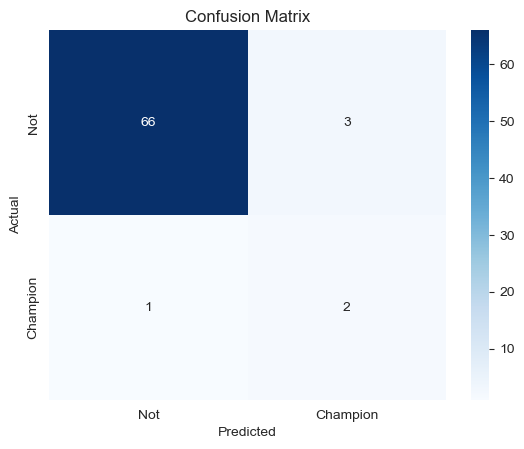

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not','Champion'], yticklabels=['Not','Champion'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(precision_score(y_test,y_pred_adjusted))
print(recall_score(y_test,y_pred_adjusted))

0.4
0.6666666666666666


Normal Accuracy: 0.9685314685314685
Normal Recall: 0.3333333333333333
Normal Precision: 0.2857142857142857
------------------------
Adjusted Accuracy 0.9370629370629371
Adjusted Recall 0.8333333333333334
Adjusted Precision 0.22727272727272727


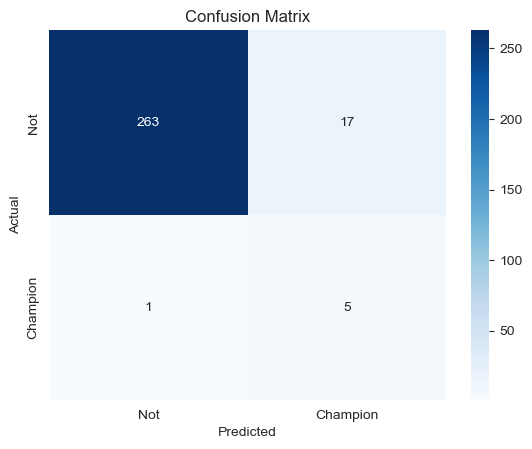

In [23]:
all_score_check(LogisticRegression(),X,y,test_size=0.4,threshold=0.09)

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_trf,y_train)
y_pred = dt.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9305555555555556

In [25]:
y_probs = dt.predict_proba(X_test_trf)[:,1]
y_pred_adjusted = (y_probs >= 0.3).astype(int)
recall_score(y_test, y_pred_adjusted)

0.3333333333333333

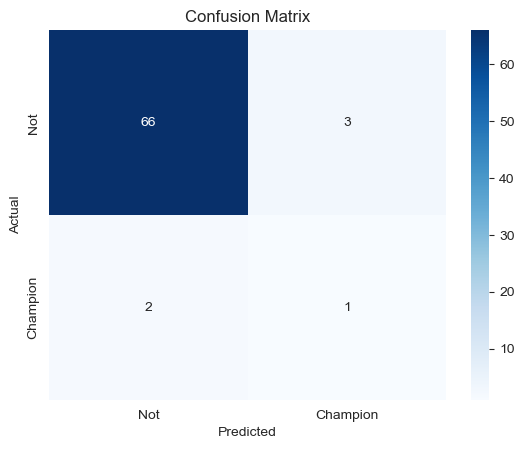

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not','Champion'], yticklabels=['Not','Champion'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(precision_score(y_test,y_pred_adjusted))
print(recall_score(y_test,y_pred_adjusted))

0.25
0.3333333333333333


Normal Accuracy: 0.9475524475524476
Normal Recall: 0.5
Normal Precision: 0.2
------------------------
Adjusted Accuracy 0.9475524475524476
Adjusted Recall 0.5
Adjusted Precision 0.2


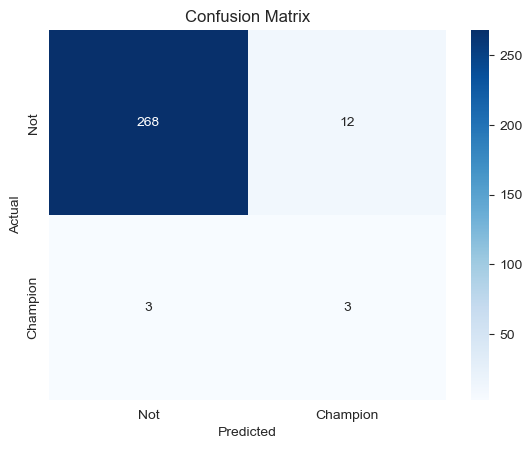

In [28]:
all_score_check(DecisionTreeClassifier(),X,y,test_size=0.4,threshold=0.09)

# Random Forrest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_trf,y_train)
y_pred = rf.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9444444444444444

In [30]:
y_probs = rf.predict_proba(X_test_trf)[:,1]
y_pred_adjusted = (y_probs >= 0.05).astype(int)
recall_score(y_test, y_pred_adjusted)

1.0

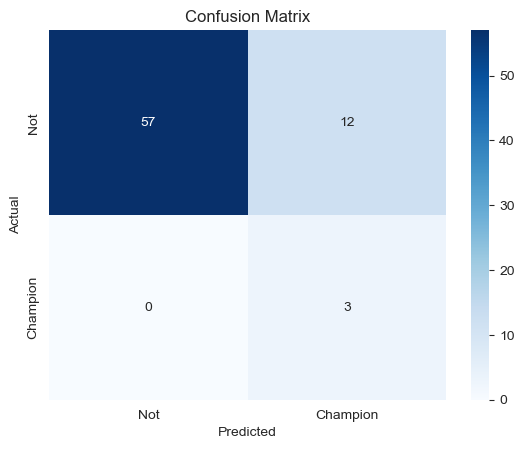

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not','Champion'], yticklabels=['Not','Champion'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(precision_score(y_test,y_pred_adjusted))
print(recall_score(y_test,y_pred_adjusted))

0.2
1.0


Normal Accuracy: 0.9790209790209791
Normal Recall: 0.3333333333333333
Normal Precision: 0.5
------------------------
Adjusted Accuracy 0.9090909090909091
Adjusted Recall 0.6666666666666666
Adjusted Precision 0.14285714285714285


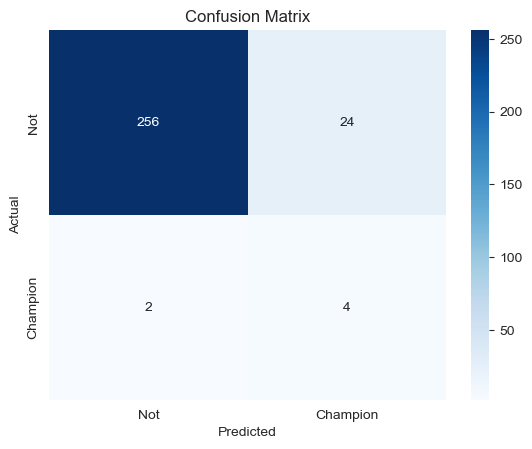

In [33]:
all_score_check(RandomForestClassifier(),X,y,test_size=0.4,threshold=0.09)

# SVM

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_trf,y_train)
y_pred = svc.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9583333333333334

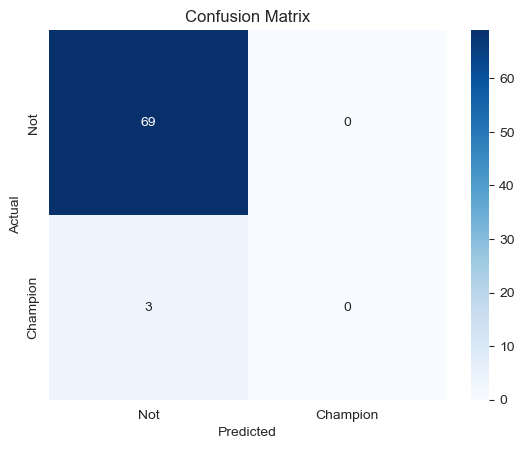

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not','Champion'], yticklabels=['Not','Champion'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.0
0.0


D:\anaconda3\envs\jh_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
X_trf = tranformer.fit_transform(X)

In [39]:
print(np.mean(cross_val_score(estimator=SVC(),X=X_trf,y=y,cv=10,scoring='accuracy')))
print(np.mean(cross_val_score(estimator=SVC(),X=X_trf,y=y,cv=10,scoring='recall')))

0.9593896713615024
0.0


In [40]:
print(np.mean(cross_val_score(estimator=RandomForestClassifier(),X=X_trf,y=y,cv=10,scoring='accuracy')))
print(np.mean(cross_val_score(estimator=RandomForestClassifier(),X=X_trf,y=y,cv=10,scoring='recall')))

0.9650234741784038
0.2333333333333333


In [41]:
print(np.mean(cross_val_score(estimator=LogisticRegression(),X=X_trf,y=y,cv=10,scoring='accuracy')))
print(np.mean(cross_val_score(estimator=LogisticRegression(),X=X_trf,y=y,cv=10,scoring='recall')))

0.9636345852895148
0.3833333333333333


In [42]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(rf, f)

tranformer.fit(X_train)
with open('tranformer.pkl','wb') as f:
    pickle.dump(tranformer, f)

In [43]:
X_test_trf.shape

(72, 146)

In [44]:
X_train_trf.shape

(642, 146)

In [45]:
for x in X_train_trf[0]:
    print(x,end=" ")

-0.7887124428666072 -0.8254126888746073 0.10146600700940012 0.09932832729437269 -0.356555267121388 -1.2114665548903043 0.24885148764271575 -0.7554925031008349 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 